In [1]:
import numpy as np
import pandas as pd
from astropy import units as u
import matplotlib.pyplot as plt

In [2]:
KPC_M = 3.08567758e+19
R0 = 8.5*KPC_M
V0 = 220*1000
V = 230*1000

In [3]:
raw = pd.read_csv ('../data/mapfinal.csv')

In [4]:
cloud_thetas = (raw['longitude'])*3.142/180

In [5]:
raw['v_obs'] = raw ['v_obs']*1000

In [6]:
raw['R'] = ((V*R0)/(V0+((raw['v_obs'])/np.sin(cloud_thetas))))

In [7]:
c2 =raw['R']**2

In [8]:
b2=R0**2

In [9]:
sin2 = np.sin(cloud_thetas)**2

In [10]:
cos = np.cos(cloud_thetas)

In [11]:
raw['R1']=R0*np.cos(cloud_thetas)+((c2-b2*sin2)**0.5)

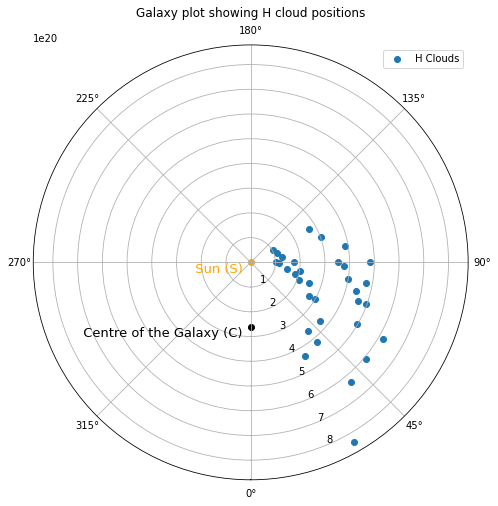

In [12]:
cloud_r = raw['R1']  # Remember that you need to compute R1 first

plt.figure(figsize = (12,8))
p= plt.subplot(111, projection = 'polar')
p.set_theta_zero_location("S")
plt.scatter(cloud_thetas, cloud_r, label ='H Clouds')
plt.scatter(0, 0, color ='orange')
plt.scatter(0, R0,color ='0')
plt.title("Galaxy plot showing H cloud positions", va = 'bottom')
plt.annotate('  Sun (S)  ', xy=(0,0), size='13', color ='orange', horizontalalignment='right', verticalalignment='top')
plt.annotate('  Centre of the Galaxy (C)  ', xy=(0,R0), size='13',horizontalalignment='right', verticalalignment='top')
plt.legend()            
plt.show()